### Homework 2
Modern Stellar Astrophysics 

Prof. Melissa Ness

Yasmeen Asali 

October 18th, 2018

In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

### Problem 2



In [ ]:
dt = [('x','f8'),('y','f8'),('z','f8'),('vx','f8'),('vy','f8'),('vz','f8')]
data = np.genfromtxt('modelR1GaiaChallenge',dtype=dt)
np.save('modelR1data',data)

In [2]:
modelR1data = np.load('modelR1data.npy')
print(np.shape(modelR1data))

(7489269,)


In [3]:
idx_cut = np.random.randint(0, 7489269, 50000)

In [4]:
x = modelR1data['x']
y = modelR1data['y']
z = modelR1data['z']

x = x[idx_cut]
y = y[idx_cut]
z = z[idx_cut]

In [5]:
size_cut = np.where((z<2) & (z>-2) & (x>-4) & (x<4))

x = x[size_cut]
y = y[size_cut]
z = z[size_cut]

In [6]:
#point density in xz plane
xz_num = np.vstack([x,z])
c_num = gaussian_kde(xz_num)(xz_num)

KeyboardInterrupt: 

In [ ]:
#sort by density, so that the densest points are plotted last
idx_dens = c_num.argsort()
x, z, c_num = x[idx_dens], z[idx_dens], c_num[idx_dens]

In [ ]:
plt.scatter(x, z, c=c_num, s=1)
plt.xlabel("x-axis", size=10)
plt.ylabel("z-axis", size=10)
plt.colorbar().set_label("Number Density")
plt.show()

We can almost see an X feature in the above plot of 50,000 stars (more stars would just take too long to compute the density colorbar). Let's try an unsharp mask to see if that helps. 

In [ ]:
#attempt to do a unsharp mask
%matplotlib inline

x_fake, z_fake = np.random.normal(0, 1, len(c_num)), np.random.normal(0, 1, len(c_num))

xz_fake = np.vstack([x_fake,z_fake])
c_fake = gaussian_kde(xz_fake)(xz_fake)

In [ ]:
c_new = c_num / c_fake

In [ ]:
plt.scatter(x, z, c=c_new, s=0.01, vmax=10)
plt.xlabel("x-axis", size=10)
plt.ylabel("z-axis", size=10)
plt.colorbar()

So we kinda have an X shape? Let's try a 2D histogram. 

Since everything has been renamed, let's just reload the data again and start anew.

In [3]:
x = modelR1data['x']
y = modelR1data['y']
z = modelR1data['z']

/Users/yasmeenasali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


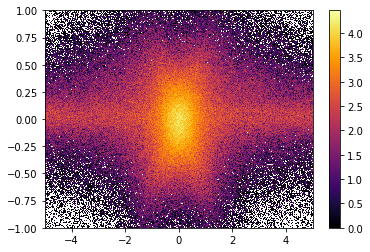

In [69]:
#making 2D histograms 
N = 0.005
bins_x = np.arange(-15, 15, step=N)
bins_z = np.arange(-5, 5, step=N)

hist = np.histogram2d(z, x,
                     bins=(bins_z, bins_x))

plt.imshow(np.log(hist[0]), aspect='auto', extent=[min(bins_x), max(bins_x), min(bins_z), max(bins_z)],
          interpolation='nearest', cmap='inferno')
plt.xlim(-5,5)
plt.ylim(-1,1)
plt.colorbar()

In [86]:
#another less cool way to make histograms
#plt.hist2d(x,z, bins=100)

Wow look at that x! Let's see if the upper arms are stronger than the lower arms. 

/Users/yasmeenasali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


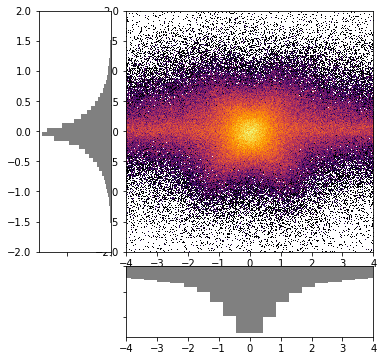

In [121]:
N = 0.005
bins_x = np.arange(-15, 15, step=N)
bins_z = np.arange(-5, 5, step=N)

fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
z_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

main_ax.imshow(np.log(hist[0]), aspect='auto', extent=[min(bins_x), max(bins_x), min(bins_z), max(bins_z)],
          interpolation='nearest', cmap='inferno')
main_ax.set_xlim([-4, 4])
main_ax.set_ylim([-2, 2])

x_hist.hist(x, 100, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

z_hist.hist(z, 100, histtype='stepfilled',
            orientation='horizontal', color='gray')
z_hist.invert_xaxis()

So looking at the histogram of density on the z-axis we can clearly see that it is larger on the upper half than the lower half, meaning there is a higher density in the upper arms. Maybe we can find a more exact measure. 

Text(0,0.5,'Number')

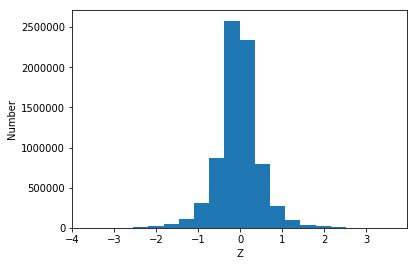

In [126]:
(n, bins, patches) = plt.hist(z, bins=20)
plt.xlabel('Z')
plt.ylabel('Number')

In [133]:
#since there are 20 bins, the middle bin (highest bin) is indexed by [9]
#to find the two bins on either side we just used the indices [8] and [10]
lower_arm_num = n[8]
upper_arm_num = n[10]

diff = upper_arm_num - lower_arm_num
frac = upper_arm_num / lower_arm_num

print("upper arms density:", upper_arm_num)
print("lower arms density:", lower_arm_num)
print("upper arms density is", diff, "bigger, so a factor of", frac)

upper arms density: 2333296.0
lower arms density: 864531.0
upper arms density is 1468765.0 bigger, so a factor of 2.6989153656722547


upper arms density: 729080.0
lower arms density: 644626.0
upper arms density is 84454.0 bigger, so a factor of 1.1310124009891007


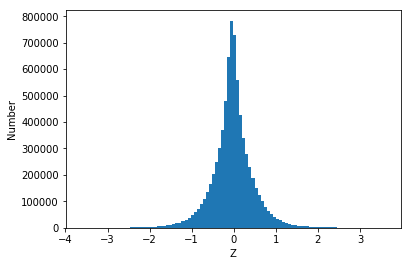

In [135]:
#checking the result with more bins means that we are looking at the more immediate region next to the center
(n, bins, patches) = plt.hist(z, bins=100)
plt.xlabel('Z')
plt.ylabel('Number')

lower_arm_num_x = n[48]
upper_arm_num_x = n[50]

diff_x = upper_arm_num_x - lower_arm_num_x
frac_x = upper_arm_num_x / lower_arm_num_x

print("upper arms density:", upper_arm_num_x)
print("lower arms density:", lower_arm_num_x)
print("upper arms density is", diff_x, "bigger, so a factor of", frac_x)

So the upper arms are stronger! 

Now let's check if the x is centered.

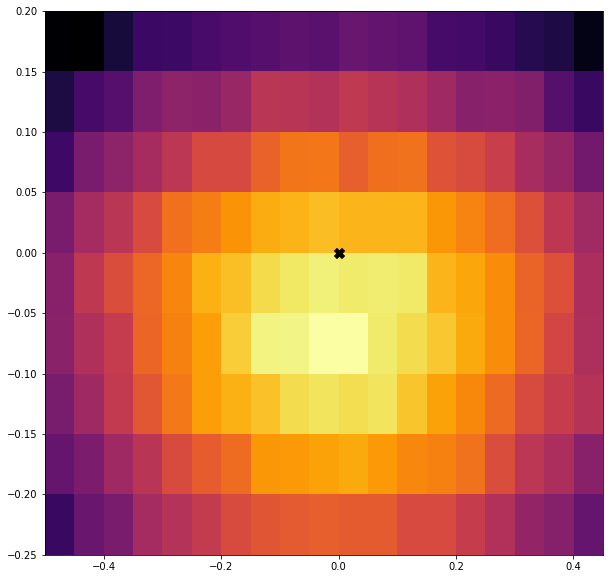

In [164]:
N = 0.05
bins_x = np.arange(-0.5, 0.5, step=N)
bins_z = np.arange(-0.25, 0.25, step=N)

hist = np.histogram2d(z, x,
                     bins=(bins_z, bins_x))
plt.figure(figsize=(10,10))
plt.imshow(np.log(hist[0]), aspect='auto', extent=[min(bins_x), max(bins_x), min(bins_z), max(bins_z)],
          interpolation='nearest', cmap='inferno')
plt.scatter(0, 0, marker='X', s=100, c='k')

Judging by the above graph, it appears that the brightest point is a little bit lower than the exact center marked by an x, since the bin with the max density is clearly below the location of (0,0). 

All that's left is rotating the graph to see if the x feature is altered. 

In [5]:
%matplotlib inline
def convert_to_polar(x, y):
    theta = np.arctan2(y, x)
    return theta

theta = convert_to_polar(x, y)

/Users/yasmeenasali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


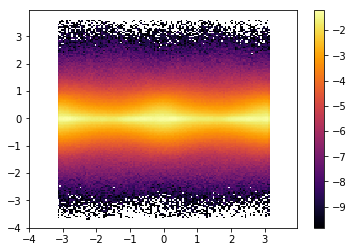

In [10]:
N = 0.05
bins_theta = np.arange(-4, 4, step=N)
bins_z = np.arange(-4, 4, step=N)

hist = np.histogram2d(z, theta, normed=True,
                     bins=(bins_z, bins_theta))

plt.imshow(np.log(hist[0]), aspect='auto', extent=[min(bins_theta), max(bins_theta), min(bins_z), max(bins_z)],
          interpolation='nearest', cmap='inferno')
plt.colorbar()

/Users/yasmeenasali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


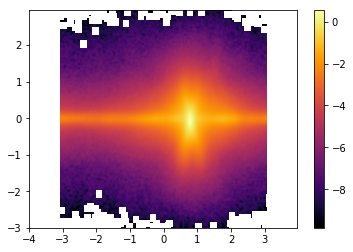

In [8]:
def convert_to_polar_shift(x, y):
    theta = np.arctan2(y+3, x+3)
    return theta

theta_sh = convert_to_polar_shift(x, y)

N = 0.05
bins_theta = np.arange(-4, 4, step=N)
bins_z = np.arange(-3, 3, step=N)

hist_sh = np.histogram2d(z, theta_sh, normed=True,
                     bins=(bins_z, bins_theta))

plt.imshow(np.log(hist_sh[0]), aspect='auto', extent=[min(bins_theta), max(bins_theta), min(bins_z), max(bins_z)],
          interpolation='gaussian', cmap='inferno')
plt.colorbar()

In [20]:
print(len(x))
print(len(y))
print(len(theta_sh))

7489269
7489269
7489269


As expected, the X feature appears less obvious when viewed from an offset angle. This implies that unless we are looking directly at a galaxy it will be difficult to detect this inner structure. As the x and y offsets are increased, the x feature tends to collapse more in theta. 

### Problem 3

**Part a)**

The Kelvin Helmholtz mechanism theorizes that stars or planets (Jupiter in this case) that are not in hydrostatic equilibrium will undergo contraction as the surface cools, causing an increase in core temperature which prevents the planet from collapsing immediately. The thermal timescale is the amount of time this mechanism can persist before all of Jupiter's energy is radiated away. It can be calculated using the following formula:  

$$ \tau_{th} = \frac{\Delta{E_{g}}}{L} = \frac{GM^2}{RL} $$

Solving this equation below, we find Jupiter's thermal timescale is 321 gigayears. Since Jupiter is only 4.5 Gyr old, gravitational contraction could have power its luminosity for its entire lifetime, so we cannot assume it is in hydrostatic equilibrium. 

In [3]:
def ts_thermal(M, R, L):
    G = 6.64e-8 * (u.cm)**3 / (u.g * (u.s)**(2))
    t_in_seconds = (G*(M**2))/(R*L)
    t_in_Gyr = t_in_seconds * (3.17e-17 * u.Gyr / u.s)
    return t_in_Gyr

M_jup = 1.9e30 * u.g
R_jup = 7.1e9 * u.cm
L_jup = 8.7e-10 * (3.83e33 * u.g * (u.cm)**2 * (u.s)**(-3))

print(ts_thermal(M_jup, R_jup, L_jup))

321.18715474021167 Gyr


**Part b)**

If Jupiter's radius is shrinking only due to radiation we can set up conservation of energy by equating the amount of energy lost in gravitational potential energy to the amoutn of energy emitted in luminosity:

$$ \Delta{E_{g}} = \Delta{E_{emitted}} $$
$$ \frac{GM^2}{r(t)} = Lt $$

We can take the time derivative of both sides, noting that since the star is contracting, radius is no longer a constant but now a function of time. 

$$ \frac{d}{dt}(\frac{GM^2}{r(t)}) = L $$

Using the recipricol rule for derivatives

$$ \frac{-GM^2}{r(t)^2}\frac{dr(t)}{dt} = L $$
$$ \frac{dr(t)}{dt} = \frac{-Lr(t)^2}{GM^2} $$

We are trying to find the rate at a given time (now), so we can substitute $ r(t) = R_{jupiter} $. Also, since we know that the radius is contracting, we can ignore the negative sign and calculate the rate

In [30]:
def contr_rate(M, R, L):
    G = 6.64e-8 * (u.cm)**3 / (u.g * (u.s)**(2))
    return (L*R**2)/(G*M**2)
def convert_to_year_per_sec(value):
    return value * (u.s / (3.17098e-8 * u.yr))

print(contr_rate(M_jup, R_jup, L_jup))
print(convert_to_year_per_sec(contr_rate(M_jup, R_jup, L_jup)))

7.007440885425358e-10 cm / s
0.022098659989736164 cm / yr


Our value is 0.02 cm per year, which is 2 orders of magnitude off of the (googled) value of 2 cm per year. This offset can be attributed to the fact that we assumed a simplified equation of the gravitational potential energy, ignoring the factor that arises from the density distribution. 

### Problem 4

** Part a) ** 

We can start by taking the derivative of the given equation for $\tau$:

$$ \frac{d\tau}{dT} = - \frac{(\frac{27E_{G}}{UKT})^{1/3}}{3T} $$
$$ \frac{d\tau}{dT} = - \frac{\tau}{3T} $$

Taking the log of the given equation for $R_{AB}$:

$$ \ln{R_{AB}} = \ln{(C\tau^2e^{-\tau})} $$
$$ \ln{R_{AB}} = \ln{C} - \ln{e^{-\tau}} + 2\ln{\tau} $$
$$ \ln{R_{AB}} = \ln{C} - \tau + 2\ln{\tau} $$

Rearranging the above equation for derivative of $\tau$ we find:

$$ \frac{d\tau}{\tau} = - \frac{dT}{3T} $$

and we can represent the right side of this equation as: 

$$ \frac{d\tau}{\tau} = - \frac{1}{3}d\ln{T} $$
$$ -3\frac{d\tau}{\tau} = d\ln{T} $$

so we can show that:

$$ \frac{d\ln{R_{AB}}}{d\ln{T}} = \frac{d\ln{R_{AB}}\tau}{-3{d\tau}} $$
$$ \frac{d\ln{R_{AB}}}{d\ln{T}} = - \frac{\tau}{3}\frac{d}{d\tau}(\ln{C} - \tau + 2\ln{\tau}) $$
$$ \frac{d\ln{R_{AB}}}{d\ln{T}} = - \frac{\tau}{3}(\frac{2}{\tau} - 1) $$

$$ \boxed{\frac{d\ln{R_{AB}}}{d\ln{T}} = \frac{\tau}{3} - \frac{2}{3}} $$


**Part b)**

We start with a basic power law:

$$ R_{AB} = aT^{n} $$

Plugging this into the given equation and taking the log of both sides gives:

$$ aT^{n} = aT^{n}_{r}[\frac{T}{T_{r}}]^n $$
$$ \ln{a} + n\ln{T} = \ln{a} + n\ln{T_{r}} + n\ln{T} - n\ln{T_{r}} $$
$$ \ln{a} + n\ln{T} = \ln{a} + n\ln{T} $$

So a power law such as $ R_{AB} = aT^{n} $ solves this equation.

** Part c) ** 

Using the equations given in the problem and a core temperature for the sun of 15.9 million degrees Kelvin ([source](http://ds9.ssl.berkeley.edu/solarweek/DISCUSSION/howhot.html)), we calculate $n=3.8$. 

The rate of energy released $q$ scales with the fourth power of temperature, which is larger than the power of $n=3.8$ that we calculated here. 

In [85]:
def tau(E, T):
    return ((27*E)/(4*8.617e-5*(u.eV / u.K)*T))**(1/3)

def n_val(tau):
    return (tau - 2) / 3

E_solar = 4.9e5 * u.eV
T_solar = 15.9e6 * u.K

print(n_val(tau(E_solar, T_solar)))

3.8049128404055885


### Problem 5

**Part a)**

The mean free path ${l}$ tells us how far we can see through the Earth's atmosphere, and it is given by:

$$ l = (\kappa\rho)^{-1} $$

Plugging in the given values we get:

In [9]:
op_E = 0.264 * u.cm**2 / u.g
dens_E = 1.2e-3 * u.g / u.cm**3
mfp_E = 1 / (op_E*dens_E)

print(mfp_E)

3156.5656565656564 cm


** Part b) **

Using the same formula, we can calculate the mean free path for a photon in the sun

In [23]:
op_S = 1.16 * u.cm**2 / u.g
dens_S = 162 * u.g / u.cm**3
mfp_S = 1 / (op_S*dens_S)

print(mfp_S)

0.005321413367390379 cm


** Part c) **

Distance travelled by a photon can be expresed as:

$$ d = \sqrt{N}l $$

For a photon coming from the center of the Sun to its surface, $ d = R_{\odot} $. So the number of steps is

$$ N = \frac{R_{\odot}^2}{l^2} $$

So here $N$ signifies the number of random steps a photon. This photon will travel a distance $l$ per random step, so the total distance travelled is

$$ D = Nl $$

and so we can express the amount of time it takes (considering the constant speed of light) as:

$$ t = \frac{Nl}{c} = \frac{R_{\odot}^2}{lc} $$

Plugging in our values we get that it will take a photon 960,393 years to travel from the center to the surface of the Sun. Crazy! 

In [31]:
R_sun = 6.95e10 * u.cm
c = 2.997e10 * u.cm / u.s
t_photon = (R_sun**2 ) / (mfp_S * c)

def convert_to_year(value):
    return value * (3.17098e-8 * u.yr) / u.s

print(t_photon)
print(convert_to_year(t_photon))

30286972972972.973 s
960393.8555783783 yr
